# [E-02] (2) 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## 목적 : 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측

In [1]:
# 데이터 가져오기
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
# 필요한 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split

In [3]:
# datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year # 연도 정보
train['month'] = train['datetime'].dt.month # 월 정보
train['day'] = train['datetime'].dt.day # 일 정보
train['hour'] = train['datetime'].dt.hour # 시간 정보
train['minute'] = train['datetime'].dt.minute # 분 정보
train['second'] = train['datetime'].dt.second # 초 정보

<AxesSubplot:xlabel='second', ylabel='count'>

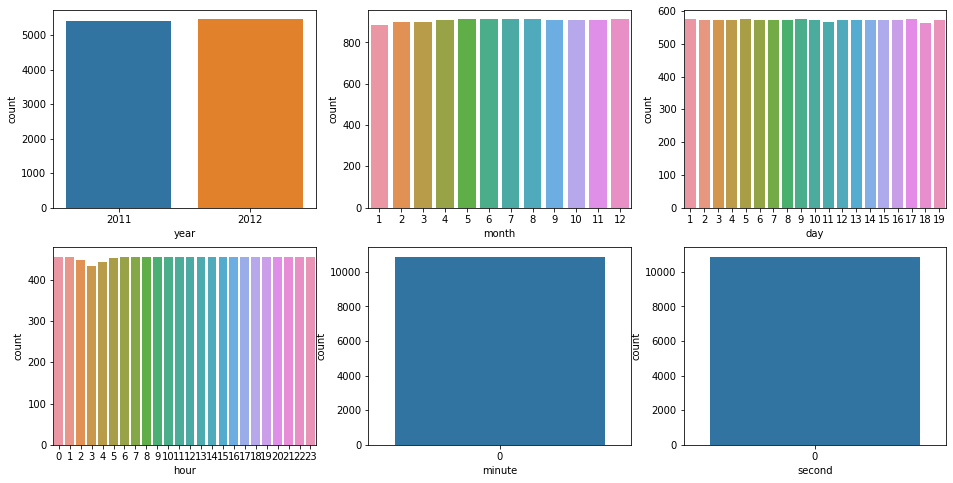

In [4]:
# 연, 월, 일, 시, 분, 초까지 6가지 컬럼에 대한 시각화
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(x = train['year'], data = train)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(x = train['month'], data = train)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(x = train['day'], data = train)

ax4 = fig.add_subplot(2,3,4)
sns.countplot(x = train['hour'], data = train)

ax5 = fig.add_subplot(2,3,5)
sns.countplot(x = train['minute'], data = train)

ax6 = fig.add_subplot(2,3,6)
sns.countplot(x = train['second'], data = train)

In [5]:
# X, y 컬럼 선택 및 train/test 데이터 분리 (오류!)
X = train[['year', 'month', 'day', 'season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed']].values
y = train[['count']].values
# .values 가 문제가 생김.. 왜??
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [6]:
pd.DataFrame(X)
# .values를 하니 특성 이름이 0,1,2...가 됨. 오류는 아니지만 나중에 할 코드에 문제가 생김.

,0,1,2,3,4,5,6,7,8,9
0,2011.0,1.0,1.0,1.0,0.0,0.0,1.0,9.84,81.0,0.0000
1,2011.0,1.0,1.0,1.0,0.0,0.0,1.0,9.02,80.0,0.0000
2,2011.0,1.0,1.0,1.0,0.0,0.0,1.0,9.02,80.0,0.0000
3,2011.0,1.0,1.0,1.0,0.0,0.0,1.0,9.84,75.0,0.0000
4,2011.0,1.0,1.0,1.0,0.0,0.0,1.0,9.84,75.0,0.0000
...,...,...,...,...,...,...,...,...,...,...
10881,2012.0,12.0,19.0,4.0,0.0,1.0,1.0,15.58,50.0,26.0027
10882,2012.0,12.0,19.0,4.0,0.0,1.0,1.0,14.76,57.0,15.0013
10883,2012.0,12.0,19.0,4.0,0.0,1.0,1.0,13.94,61.0,15.0013
10884,2012.0,12.0,19.0,4.0,0.0,1.0,1.0,13.94,61.0,6.0032


In [7]:
# X, y 컬럼 선택 및 train/test 데이터 분리
X = train[['year', 'month', 'day', 'season', 'holiday', 'workingday',	'weather', 'temp', 'humidity', 'windspeed']]
y = train[['count']]
# .values뺌.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [8]:
pd.DataFrame(X)
# 특성 이름이 다 올바르게 나옴.

,year,month,day,season,holiday,workingday,weather,temp,humidity,windspeed
0,2011,1,1,1,0,0,1,9.84,81,0.0000
1,2011,1,1,1,0,0,1,9.02,80,0.0000
2,2011,1,1,1,0,0,1,9.02,80,0.0000
3,2011,1,1,1,0,0,1,9.84,75,0.0000
4,2011,1,1,1,0,0,1,9.84,75,0.0000
...,...,...,...,...,...,...,...,...,...,...
10881,2012,12,19,4,0,1,1,15.58,50,26.0027
10882,2012,12,19,4,0,1,1,14.76,57,15.0013
10883,2012,12,19,4,0,1,1,13.94,61,15.0013
10884,2012,12,19,4,0,1,1,13.94,61,6.0032


In [9]:
#sklearn의 LinearRegression 모델 불러오기
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [10]:
# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# 학습된 모델에 X_test를 입력해서 예측값 출력
predictions = model.predict(X_test)
predictions

array([[177.90633168],
       [190.65038452],
       [217.94097075],
       ...,
       [127.15902557],
       [ 39.17850734],
       [210.33944371]])

In [12]:
# 모델이 예측한 값과 정답 target 간의 손실함수 mse, rmse 값 구하기
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse) # rmse는 mse에 제곱.
print(mse)
print(rmse)

22023.596929732907
148.40349365743688


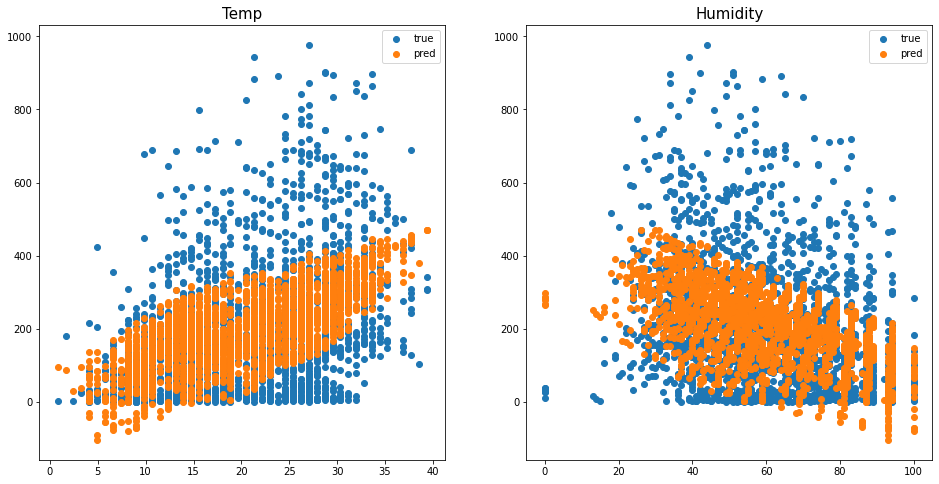

In [13]:
#  x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(1,2,1)
plt.title('Temp', fontsize=15)
plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], predictions, label="pred")
plt.legend()

ax2 = fig.add_subplot(1,2,2)
plt.title('Humidity', fontsize=15)
plt.scatter(X_test['humidity'], y_test, label="true")
plt.scatter(X_test['humidity'], predictions, label="pred")
plt.legend()

plt.show()

# 평가

- 처음에는 연, 월, 일은 필요없다 생각해서 X값에 안넣음. 그렇게 하니 rmse값이 150 이하로 떨어지지 않음. 조정할 수 있는 게 X값 밖에 없기 때문에 연, 월, 일을 넣어서 하니 rmse값이 148이 나옴.

- 예측 결과를 정답과 비교하여 시각화 했지만 정답이 밀집되있는 곳엔 예측이 잘되었지만 정답 데이터가 좀 드문 곳은 예측을 못함.

# 회고

- 자전거 대여량 예측에서 연, 월, 일이 왜 필요한 지 잘 모르겠음.
- X, y 컬럼 선택 할 때 .vlaues를 사용하니 특성 이름이 모두 숫자로 표시됨. 실행은 잘 되지만 마지막 시각화 할 때 오류가 생김. 그래서 .values를 빼고 진행.